**Problem 1**

**1. Data Exploration and understanding**

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Assesment.3/WHR-2024-5CS037.csv")

# Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [3]:
# Identify the number of rows and columns
num_rows, num_cols = df.shape
print(f"Number of rows : {num_rows}")
print(f"Number of columns : {num_cols}")

Number of rows : 143
Number of columns : 9


In [4]:
# List all the columns and their data type
print("Columns and their data types:")
print(df.dtypes)

Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


**Basic statistics**


In [5]:
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print(f"Mean of score : {mean_score}")
print(f"Median of score : {median_score}")
print(f"Standard deviation of score : {std_score}")

Mean of score : 5.52758041958042
Median of score : 5.785
Standard deviation of score : 1.1707165099442995


In [6]:
#Identify country with highest and lowest happiness scores
max_score_country = df.loc[df['score'].idxmax(), 'Country name']
min_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"Country with highest happiness score : {max_score_country}")
print(f"Country with lowest happiness score : {min_score_country}")

Country with highest happiness score : Finland
Country with lowest happiness score : Afghanistan


**Missing values**

In [7]:
# Check for missing values
print("Missing values in the dataset : ")
print(df.isnull().sum())

Missing values in the dataset : 
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**Filtering and Sorting**

In [9]:
# Filter countries with Score > 7.5
filtered_df = df[df['score'] > 7.5]
print("Countries with score > 7.5 :")
print(filtered_df[['Country name', 'score']])

Countries with score > 7.5 :
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


In [10]:
# Sort the filtered dataset by GDP per capita in descending order
sorted_filtered_df = filtered_df.sort_values(by = 'Log GDP per capita', ascending=False)
print("Top 10 countries with highest GDP per Capita :")
print(sorted_filtered_df[['Country name', 'Log GDP per capita']].head(10))

Top 10 countries with highest GDP per Capita :
  Country name  Log GDP per capita
1      Denmark               1.908
2      Iceland               1.881
0      Finland               1.844


In [11]:
# Adding a new colummn : Happiness category
def categorize_happiness(score):
  if score < 4:
    return 'Low'
  elif 4 <= score <= 6:
    return 'Medium'
  else:
    return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("Happiness Category added to the dataset :")
print(df[['Country name', 'score', 'Happiness Category']])

Happiness Category added to the dataset :
         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


**Data visualizations**

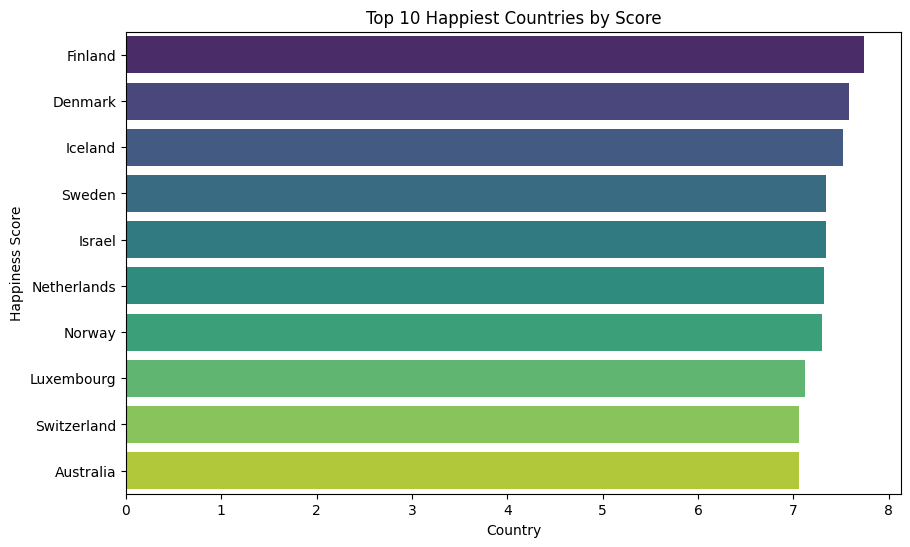

In [12]:
# Bar Plot: Top 10 happiest countries

import matplotlib.pyplot as plt
import seaborn as sns

happiest_countries = df.nlargest(10, 'score')
plt.figure(figsize = (10,6))
sns.barplot(x='score', y='Country name', hue='Country name', data=happiest_countries, dodge=False, palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=360)
plt.show()


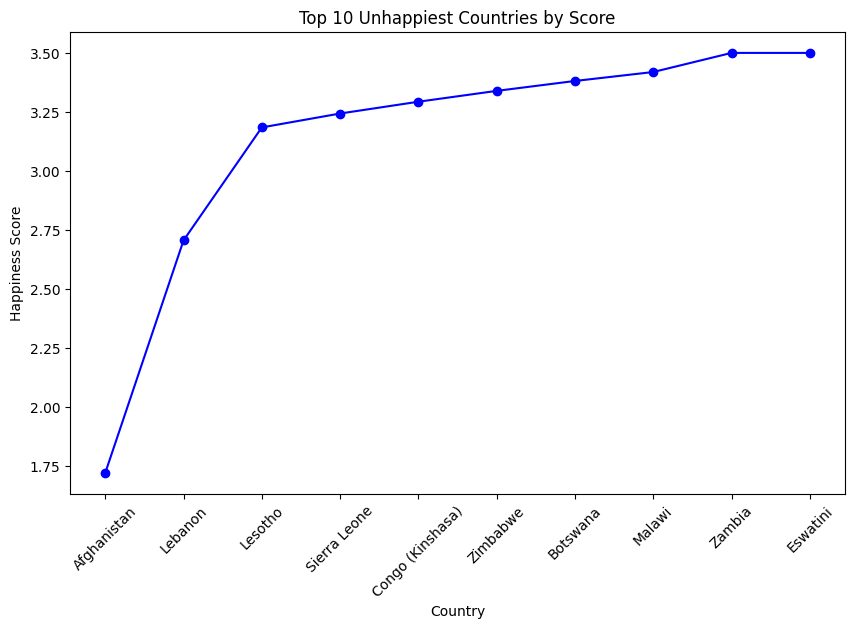

In [13]:
# Line plot : Top 10 unhappiest countries
unhappiest_countries = df.nsmallest(10, 'score')
plt.figure(figsize=(10,6))
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o', linestyle='-', color='blue')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

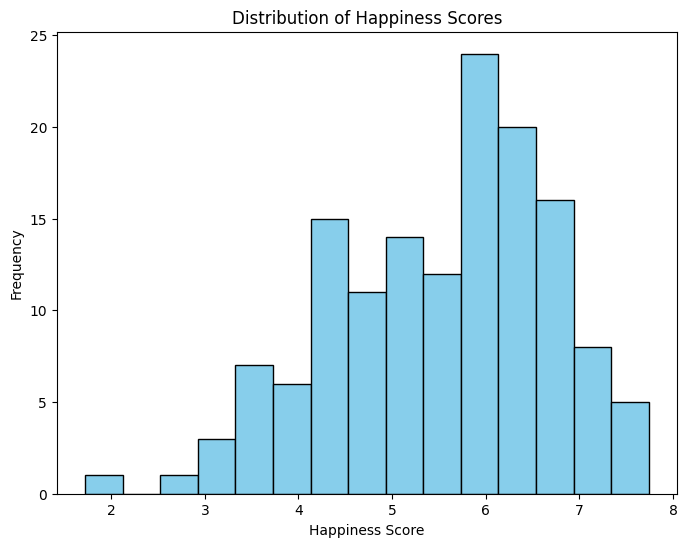

In [14]:
# Histogram: Distribution of score
plt.figure(figsize=(8,6))
plt.hist(df['score'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

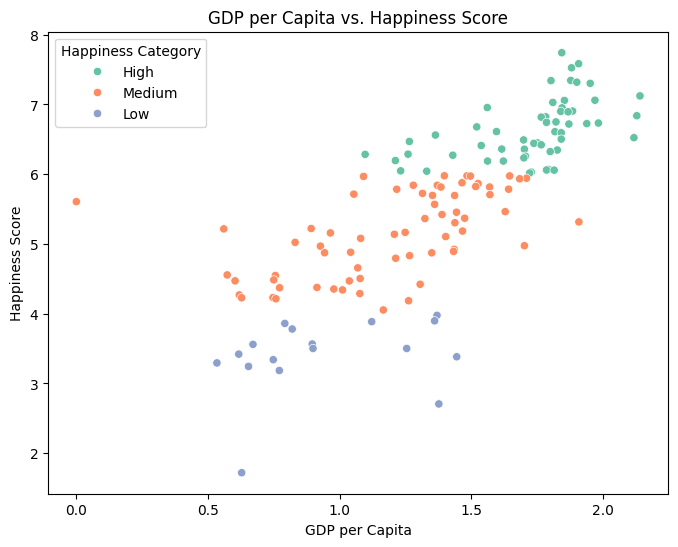

In [15]:
# Scatter PLot: GDP per Capita vs. Score
plt.figure(figsize=(8,6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='Happiness Category', palette='Set2')
plt.title('GDP per Capita vs. Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.show()

**PROBLEM 2**

**Task 1: Setup task**

In [16]:
# Define countries in South Asia
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Srilanka"]

# Filter the dataset for South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Display the filtered dataset
print("Filtered dataset for south asian countries:")
print(south_asia_df)

# Save the filtered dataframe as a separate csv file
south_asia_df.to_csv('South_Asia_Happiness.csv', index=False)
print("Filtered south asia dataset saved as 'South_Asia_Happiness.csv")



Filtered dataset for south asian countries:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783        

**Task 2: Composite Score Ranking**

In [18]:
# Create the Composite Score
# Composite Score = 0.40 * GDP per Capita + 0.30 * Social Support + 0.30 * Healthy Life Expectancy
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Rank South Asian countries based on composite score
ranked_south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
print("Ranked south asian countries based on composite scores:")
print(ranked_south_asia_df[['Country name', 'Composite Score']])

Ranked south asian countries based on composite scores:
    Country name  Composite Score
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-18-3e1fb8f24698>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (


<ipython-input-19-63fc8b573ac8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data= top_5_countries, palette = 'viridis')


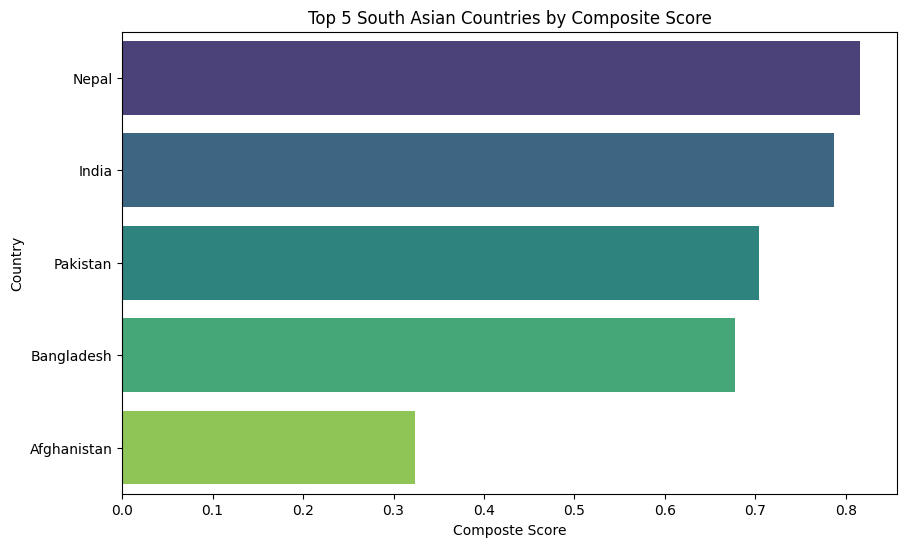

In [19]:
# Visualize the top 5 countries with a horizontal bar chart

import matplotlib.pyplot as plt
import seaborn as sns

top_5_countries = ranked_south_asia_df.head(5)
plt.figure(figsize=(10,6))
sns.barplot(x='Composite Score', y='Country name', data= top_5_countries, palette = 'viridis')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composte Score')
plt.ylabel('Country')
plt.show()

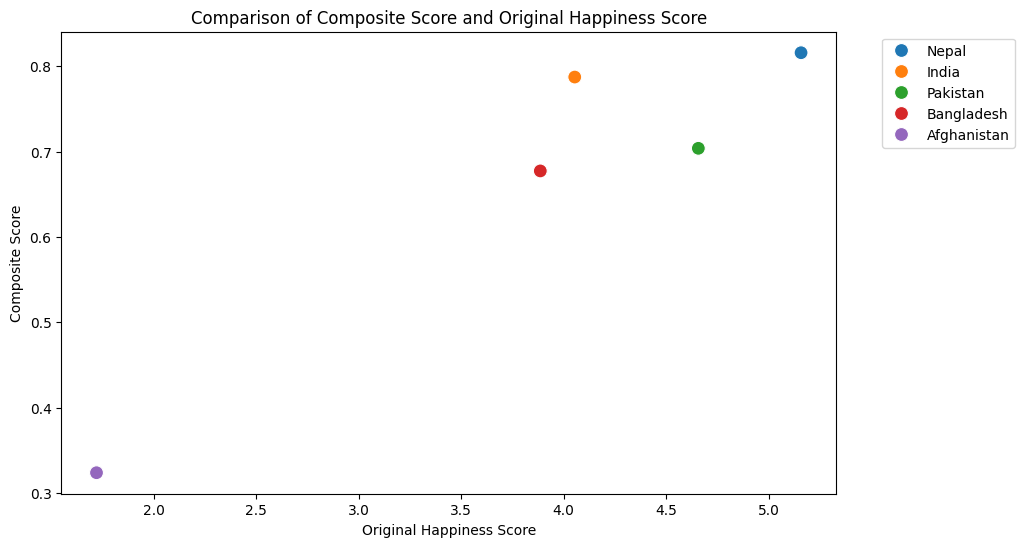

In [20]:
# Compare Composite Score and Original Happiness Score using a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='score',
    y='Composite Score',
    data = ranked_south_asia_df,
    hue='Country name',
    palette = 'tab10',
    s= 100
)
plt.title('Comparison of Composite Score and Original Happiness Score')
plt.xlabel('Original Happiness Score')
plt.ylabel('Composite Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The Composite Score aligns with the original Happiness Score, but compresses the differences between countries, especially favoring Nepal and India.

**Task 3: Outlier detection**

In [21]:
# Function to calculate outliers using the IQR method
def detect_outliers_iqr(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  return outliers, lower_bound, upper_bound

# Detect outliers for score
outliers_score, lb_score, ub_score = detect_outliers_iqr(south_asia_df, 'Log GDP per capita')
print("Outliers based on Score: ")
print(outliers_score[['Country name', 'score']])

# Detect outliers for GDP per Capita
outliers_gdp, lb_gdp, ub_gdp = detect_outliers_iqr(south_asia_df, 'Log GDP per capita')
print("Outliers based on GDP per Capita: ")
print(outliers_gdp[['Country name', 'Log GDP per capita']])


Outliers based on Score: 
    Country name  score
142  Afghanistan  1.721
Outliers based on GDP per Capita: 
    Country name  Log GDP per capita
142  Afghanistan               0.628


In [22]:
# Combine outliers for visualization
outliers_combined = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()

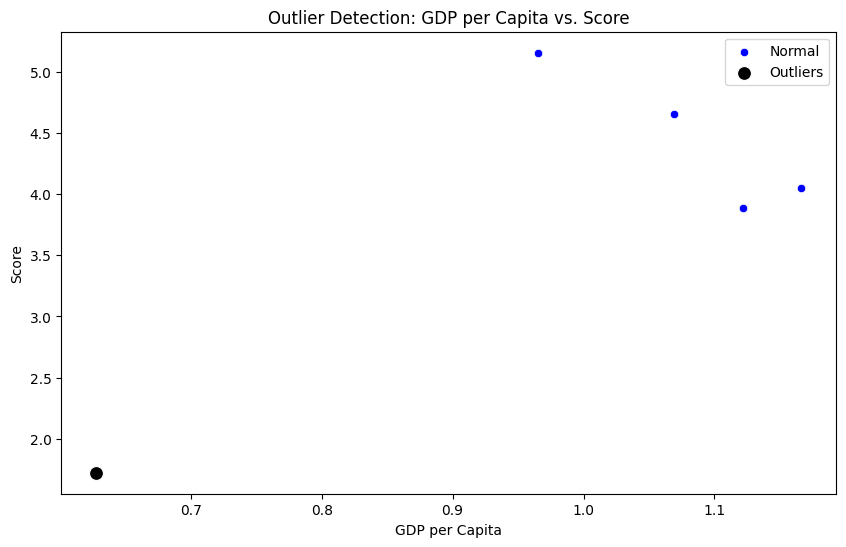

In [23]:
# Scatter Plot: GDP per Capita vs. Score with outliers highlighted
plt.figure(figsize=(10,6))
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', color='blue', label='Normal')
sns.scatterplot(data=outliers_combined, x='Log GDP per capita', y='score', color='black', s=100, label='Outliers')
plt.title('Outlier Detection: GDP per Capita vs. Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

The outlier in this graph is the point that is far away from the rest. This point shows that a country has low GDP per capita but a high happiness score, which means there might be other reasons for happiness in that country besides money.

**Task 4: Exploring trends across metrics**

In [24]:
# Choose two metrics
metrics = ['Freedom to make life choices', 'Generosity']

# Calculate Pearson correlation with the score
correlations = {}
for metric in metrics:
  correlation = south_asia_df['score'].corr(south_asia_df[metric])
  correlations[metric] = correlation

# Display correlations
print("Pearson correlation with happiness score for south asian countries: ")
for metric, corr_value in correlations.items():
  print(f"{metric}: {corr_value:.2f}")

Pearson correlation with happiness score for south asian countries: 
Freedom to make life choices: 0.80
Generosity: 0.88


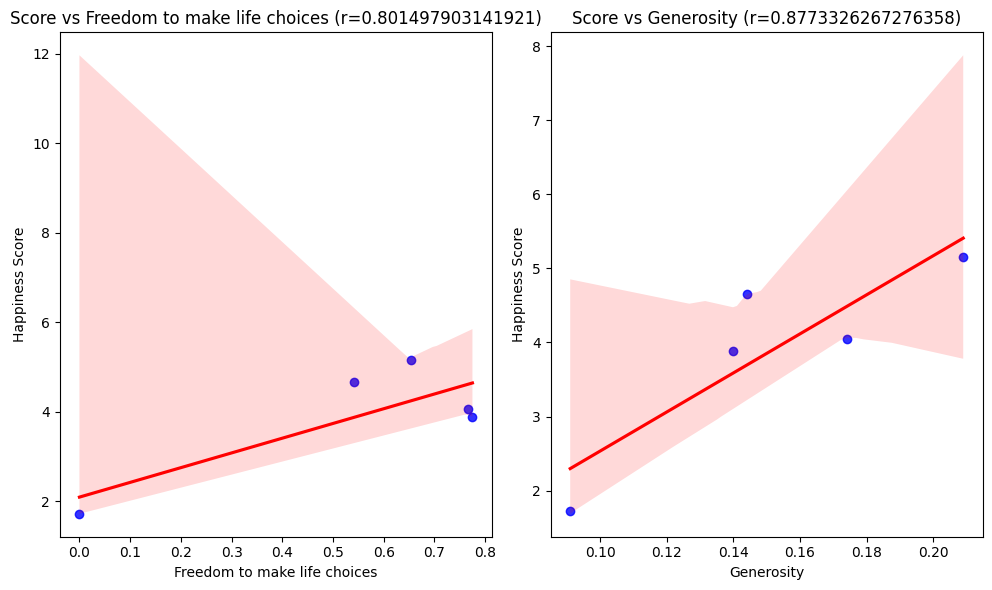

In [25]:
# Create scatter plots with trendlines

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
for i, metric in enumerate(metrics,1):
  plt.subplot(1,2,i)
  sns.regplot(data=south_asia_df, x=metric, y='score', scatter_kws={'color':'blue'}, line_kws={'color':'red'})
  plt.title(f'Score vs {metric} (r={correlations[metric]})')
  plt.xlabel(metric)
  plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

Generosity presents with stronger evidence in a positive correlation with Happiness Score compared to Freedom of making life choices. Generosity is influencing the happiness level more between the South Asian countries in comparison. However, a deeper look may be needed focusing on other factors such as per-capita GDP and social supports.

**Task 5: Gap analysis**

In [26]:
# Add a new column. GDP-Score gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']
south_asia_df['GDP-Score Gap']

<ipython-input-26-33dc5aa8bb2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


,GDP-Score Gap
92,-4.193
107,-3.588
125,-2.888
128,-2.764
142,-1.093


In [27]:
# Rank countries by GDP-Score gap in descending order
ranked_desc = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

# Rank countries by GDP-Score Gap in ascending order
ranked_asc = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)

# Display the rankings
print("Countries ranked by GDP-Score Gap (Descending):")
print(ranked_desc[['Country name', 'GDP-Score Gap']])

print("\nCountries ranked by GDP-Score Gap (Ascending):")
print(ranked_asc[['Country name', 'GDP-Score Gap']])

Countries ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193

Countries ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
142  Afghanistan         -1.093


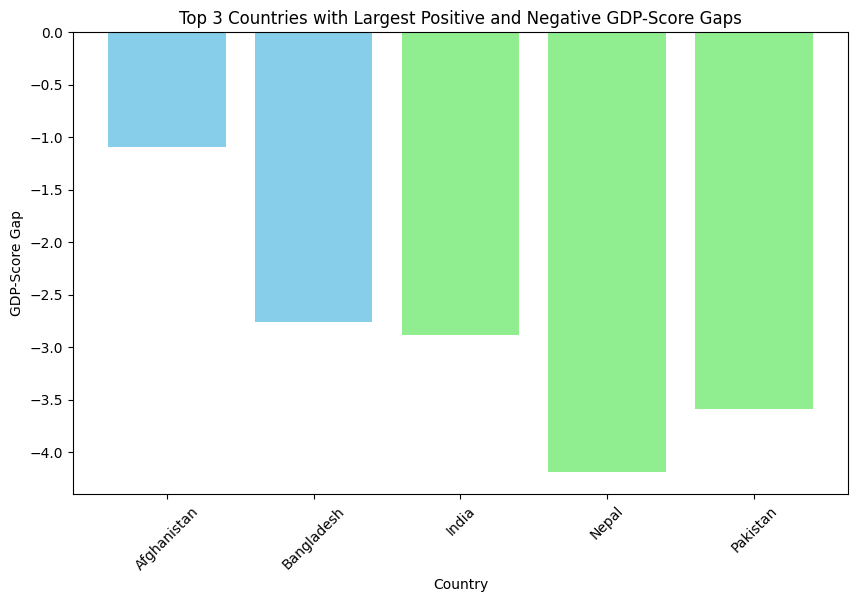

In [44]:
import matplotlib.pyplot as plt

# Get the top 3 countries with the largest positive and negative GDP-Score Gap
top_3_positive = ranked_desc.head(3)
top_3_negative = ranked_asc.head(3)

# Combine the top positive and negative gaps
top_3_gap = pd.concat([top_3_positive, top_3_negative])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_3_gap['Country name'], top_3_gap['GDP-Score Gap'], color=['skyblue']*3 + ['lightgreen']*3)
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.xticks(rotation=45)
plt.show()


Afghanistan and Bangladesh have higher happiness than expected, while India, Nepal, and Pakistan have lower happiness than expected based on their GDP. This suggests that factors beyond GDP, like social support and inequality, influence happiness in South Asia.

**Problem 3**

**Task 1: Preparing the middle eastern dataset**

In [31]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Example data for middle east countries
middle_east_data = {
    'Country name': middle_east_countries,
    'score': [6.3, 5.0, 4.7, 7.2, 6.0, 7.5, 5.4, 6.8, 5.2, 7.6, 6.9, 4.5, 7.3, 3.8],
    'Log GDP per capita': [3000, 1500, 1200, 3500, 2000, 4000, 1800, 3200, 1700, 4500, 3700, 1100, 4200, 800],
    'Social support': [1.2, 0.8, 0.6, 1.5, 1.1, 1.7, 0.9, 1.4, 0.7, 1.8, 1.6, 0.5, 1.5, 0.3],
    'Healthy life expectancy': [65, 60, 58, 72, 66, 75, 62, 70, 61, 77, 73, 57, 74, 55],
    'Freedom to make life choices' : [0.6, 0.5, 0.4, 0.8, 0.6, 0.9, 0.5, 0.7, 0.4, 0.9, 0.8, 0.3, 0.8, 0.2],
    'Generosity' : [0.2, 0.3, 0.4, 0.5, 0.4, 0.5, 0.3, 0.4, 0.2, 0.6, 0.5, 0.1, 0.6, 0.1]
}

Based on the bar charts, the metric that shows the largest disparity between the Middle East and South Asia is Log GDP per capita.

In [32]:
# Convert to dataframes
df_middle_east = pd.DataFrame(middle_east_data)
df_south_asia1 = pd.DataFrame(south_asia_df)

**1. Descriptive Analysis**

In [33]:
# Descriptive statistics
print("Middle East - Descriptive statistics")
print(df_middle_east['score'].describe())

print("\nSouth Asia - Descriptive statistics")
print(df_south_asia1['score'].describe())

mean_middle_east = df_middle_east['score'].mean()
mean_south_asia = df_south_asia1['score'].mean()

print(f"\nMean happiness score in Middle East: {mean_middle_east}")
print(f"Mean happiness score in South Asia: {mean_south_asia}")

Middle East - Descriptive statistics
count    14.000000
mean      6.014286
std       1.248296
min       3.800000
25%       5.050000
50%       6.150000
75%       7.125000
max       7.600000
Name: score, dtype: float64

South Asia - Descriptive statistics
count    5.000000
mean     3.895200
std      1.316003
min      1.721000
25%      3.886000
50%      4.054000
75%      4.657000
max      5.158000
Name: score, dtype: float64

Mean happiness score in Middle East: 6.014285714285714
Mean happiness score in South Asia: 3.8952000000000004


**2. Top and bottom performers**

In [34]:
# Top and bottom performers
print("Top and bottom performers:")
top3_middle_east = df_middle_east.nlargest(3, 'score')
bottom3_middle_east = df_middle_east.nsmallest(3, 'score')

top3_south_asia = df_south_asia1.nlargest(3, 'score')
bottom3_south_asia = df_south_asia1.nsmallest(3, 'score')

print("Middle East - Top 3 Performers:")
print(top3_middle_east)
print("Middle East - Bottom 3 Performers:")
print(bottom3_middle_east)

print("South Asia - Top 3 Performers:")
print(top3_south_asia)
print("South Asia - Bottom 3 Performers:")
print(bottom3_south_asia)


Top and bottom performers:
Middle East - Top 3 Performers:
            Country name  score  Log GDP per capita  Social support  \
9                  Qatar    7.6                4500             1.8   
5                 Kuwait    7.5                4000             1.7   
12  United Arab Emirates    7.3                4200             1.5   

    Healthy life expectancy  Freedom to make life choices  Generosity  
9                        77                           0.9         0.6  
5                        75                           0.9         0.5  
12                       74                           0.8         0.6  
Middle East - Bottom 3 Performers:
   Country name  score  Log GDP per capita  Social support  \
13        Yemen    3.8                 800             0.3   
11        Syria    4.5                1100             0.5   
2          Iraq    4.7                1200             0.6   

    Healthy life expectancy  Freedom to make life choices  Generosity  
13          

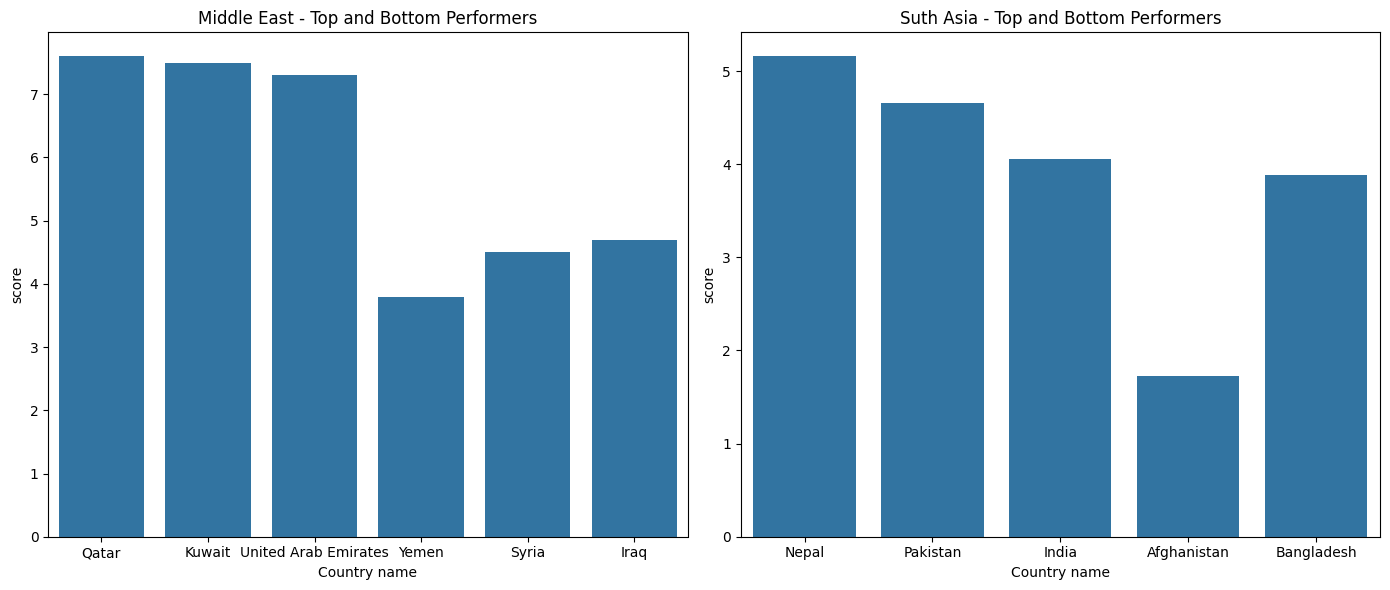

In [35]:
# Bar charts for performers

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2,figsize=(14,6))
sns.barplot(x='Country name', y='score', data=pd.concat([top3_middle_east, bottom3_middle_east]), ax=axes[0])
axes[0].set_title('Middle East - Top and Bottom Performers')
sns.barplot(x='Country name', y='score', data=pd.concat([top3_south_asia, bottom3_south_asia]), ax=axes[1])
axes[1].set_title('Suth Asia - Top and Bottom Performers')

plt.tight_layout()
plt.show()


**3. Metric comparisons**

<ipython-input-36-75528ab423ab>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-36-75528ab423ab>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-36-75528ab423ab>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


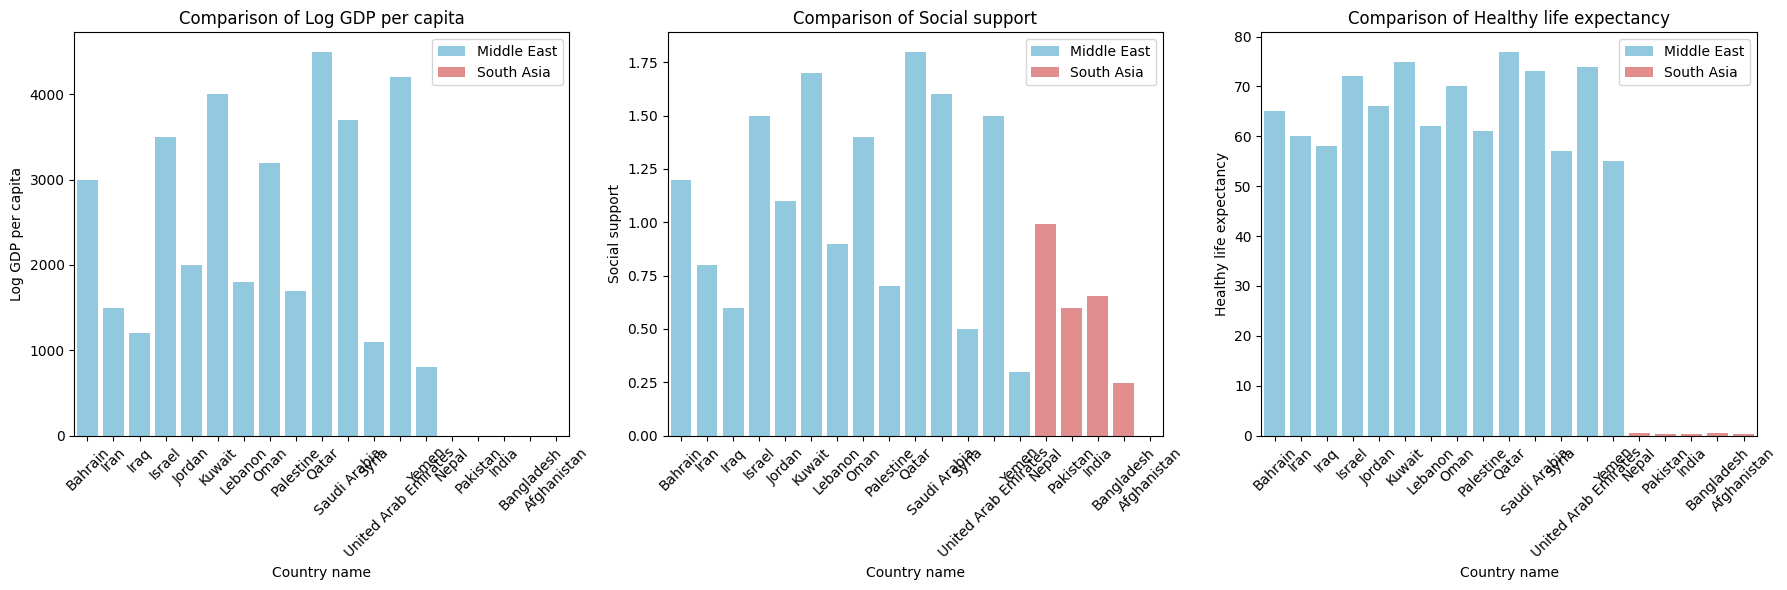

In [36]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
fig, axes = plt.subplots(1,3, figsize=(18,6))

for i, metric in enumerate(metrics):
  sns.barplot(x='Country name', y=metric, data=df_middle_east, ax=axes[i], color='skyblue', label='Middle East')
  sns.barplot(x='Country name', y=metric, data=df_south_asia1, ax=axes[i], color='lightcoral', label='South Asia')
  axes[i].set_title(f"Comparison of {metric}")
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

Based on the bar charts, the metric that shows the largest disparity between the Middle East and South Asia is Log GDP per capita.

**4. Happiness disparity**

In [37]:
range_middle_east = df_middle_east['score'].max() - df_middle_east['score'].min()
range_south_asia = df_south_asia1['score'].max() - df_south_asia1['score'].min()

cv_middle_east = df_middle_east['score'].std() / df_middle_east['score'].mean()
cv_south_asia = df_south_asia1['score'].std() / df_south_asia1['score'].mean()

print("\nHappiness Disparity:")
print(f"Range (Middle East): {range_middle_east}, Coefficient of variation: {cv_middle_east}")
print(f"Range (South Asia): {range_south_asia}, Coefficient of variation: {cv_south_asia}")

if cv_middle_east > cv_south_asia:
  print("Middle East has greater variablity in happiness scores.")
else:
  print("South Asia has greater variablity in happiness scores.")


Happiness Disparity:
Range (Middle East): 3.8, Coefficient of variation: 0.20755507811338994
Range (South Asia): 3.4370000000000003, Coefficient of variation: 0.3378523684509764
South Asia has greater variablity in happiness scores.


**5. Correlation analysis**

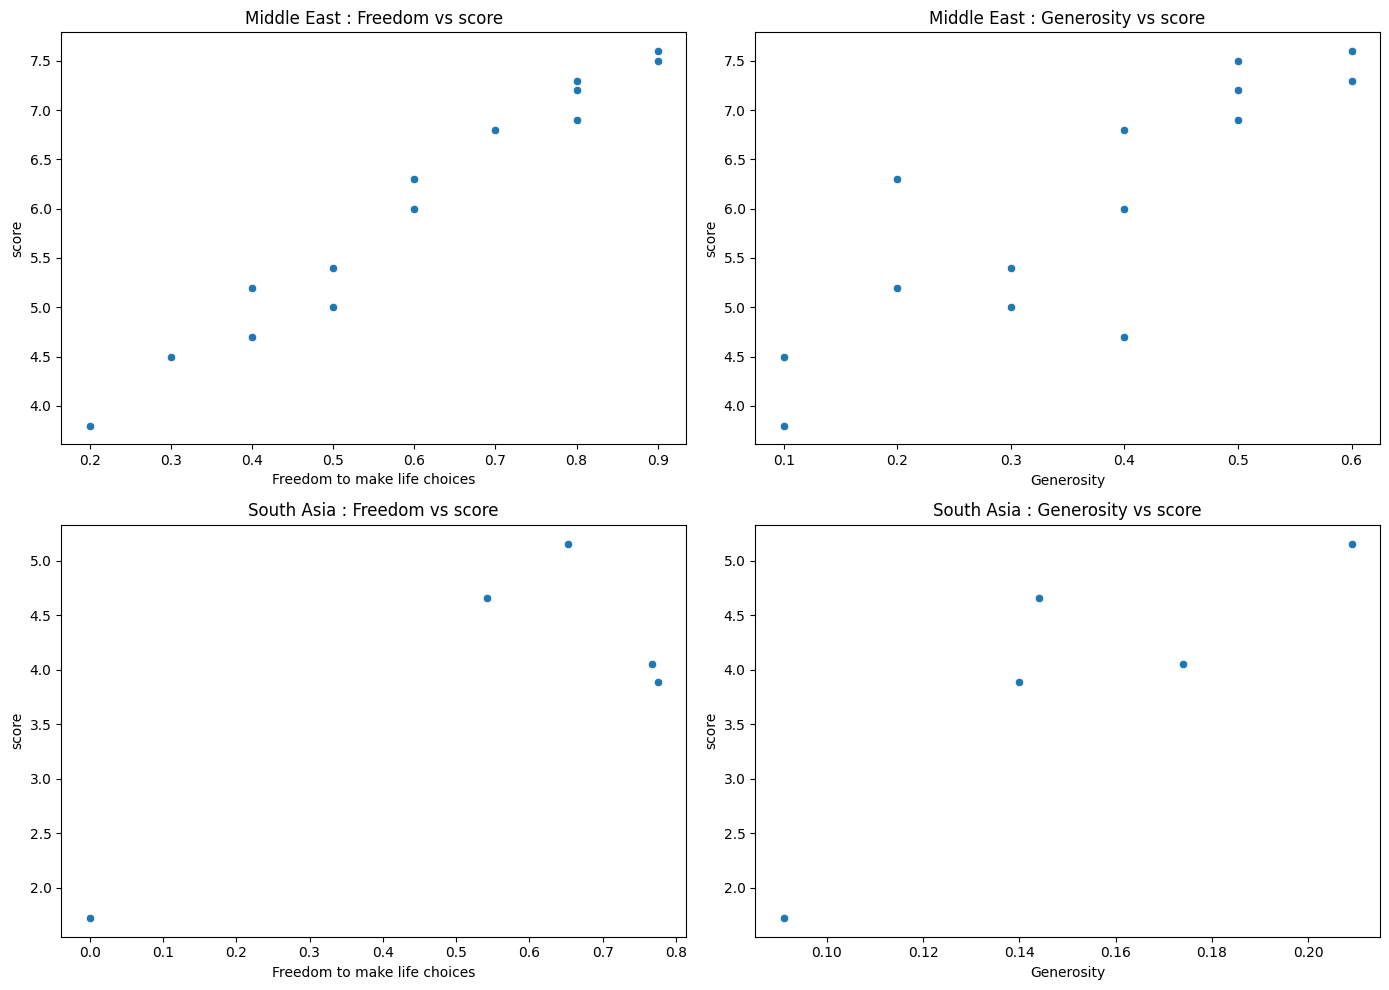

In [38]:
fig, axes = plt.subplots(2,2, figsize=(14,10))
sns.scatterplot(x='Freedom to make life choices', y='score', data=df_middle_east, ax=axes[0,0])
axes[0,0].set_title("Middle East : Freedom vs score")
sns.scatterplot(x='Generosity', y='score', data=df_middle_east, ax=axes[0,1])
axes[0,1].set_title("Middle East : Generosity vs score")

sns.scatterplot(x='Freedom to make life choices', y='score', data=df_south_asia1, ax=axes[1,0])
axes[1,0].set_title("South Asia : Freedom vs score")
sns.scatterplot(x='Generosity', y='score', data=df_south_asia1, ax=axes[1,1])
axes[1,1].set_title("South Asia : Generosity vs score")

plt.tight_layout()
plt.show()

Both regions show a positive correlation between freedom, generosity, and happiness. However, the correlation is stronger in the Middle East compared to South Asia.

In [39]:
# Correlation values
print("\Middle east correlation matrix:")
print(df_middle_east[['score', 'Freedom to make life choices', 'Generosity']].corr())

print("\nSouth asia correlation matrix:")
print(df_south_asia1[['score', 'Freedom to make life choices', 'Generosity']].corr())

\Middle east correlation matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.984558   
Freedom to make life choices  0.984558                      1.000000   
Generosity                    0.843935                      0.887822   

                              Generosity  
score                           0.843935  
Freedom to make life choices    0.887822  
Generosity                      1.000000  

South asia correlation matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.801498   
Freedom to make life choices  0.801498                      1.000000   
Generosity                    0.877333                      0.740660   

                              Generosity  
score                           0.877333  
Freedom to make life choices    0.740660  
Generosity                      1.000000  


**6. Outlier detection**

In [40]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for Score and GDP per Capita
outliers_me = detect_outliers(df_middle_east, 'score')
outliers_sa = detect_outliers(df_south_asia1, 'score')

print("Outliers in Middle East (score):")
print(outliers_me)

print("\nOutliers in South Asia (score):")
print(outliers_sa)

Outliers in Middle East (score):
Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity]
Index: []

Outliers in South Asia (score):
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
142                      0.088                0.672                Low   

     Composite Score  GDP-Score Gap  
142           0.3238         -1.093  


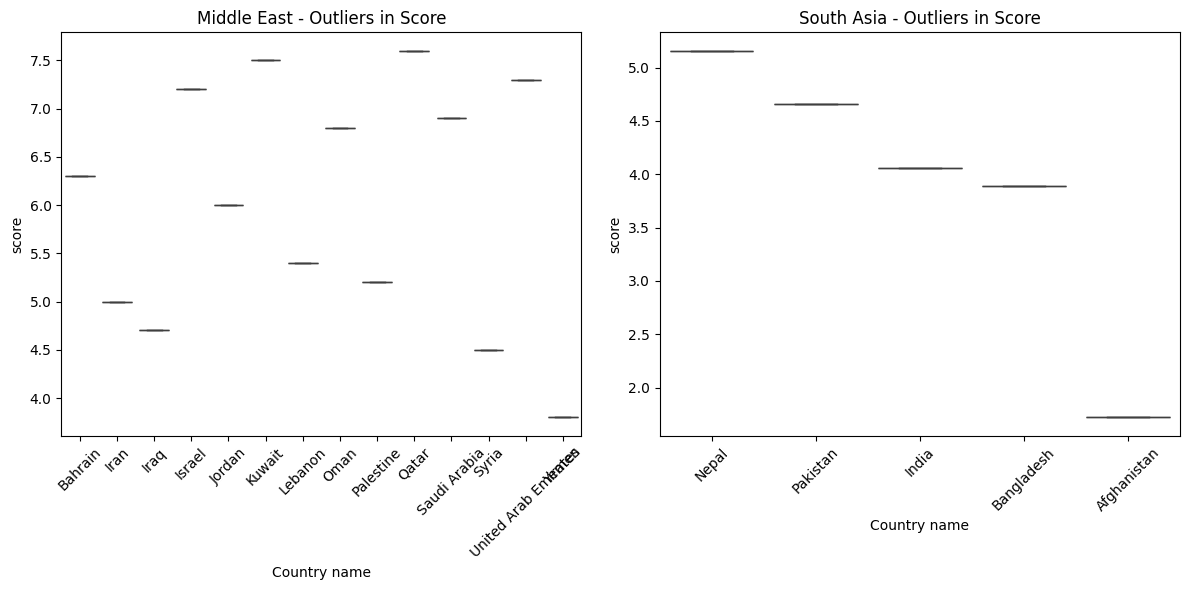

In [ ]:
# Plotting the outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y='score', x='Country name', data=df_middle_east, ax=axes[0])
axes[0].set_title("Middle East - Outliers in Score")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(y='score', x='Country name', data=df_south_asia1, ax=axes[1])
axes[1].set_title("South Asia - Outliers in Score")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The box plots show a wider range of happiness scores in the Middle East compared to South Asia, indicating greater variation in happiness levels among Middle Eastern countries.

**7. Visualization**

In [41]:
# Combine datasets for boxplot
df_middle_east['Region'] = 'Middle East'
df_south_asia1['Region'] = 'South Asia'
combined_df = pd.concat([df_middle_east, df_south_asia1])

<ipython-input-45-b9989b1a03cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='score', data=combined_df, palette='pastel')


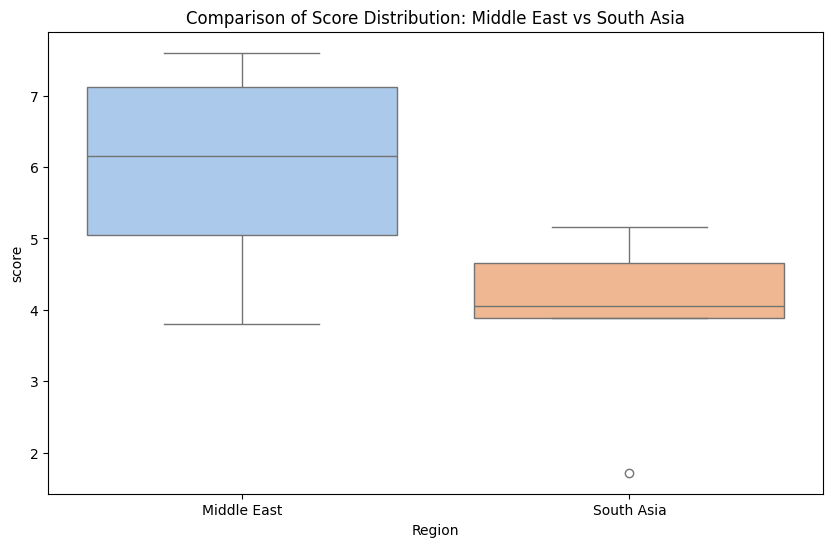

In [ ]:
# Boxplot for Score comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df, palette='pastel')
plt.title("Comparison of Score Distribution: Middle East vs South Asia")
plt.show()

The box plot indicates that Middle Eastern countries have a wider range of happiness scores, suggesting more variation in the level of happiness compared to South Asian countries.